
### Load the diabetes dataset using Pandas. Diabetes dataset does not have column tags in  the dataset files so the column tags need to be added while the data is being read into the dataframe. Use the names parameter in read_csv() method to read the column tags  provided below: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
import numpy as np

columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
filename = 'pima-indians-diabetes.data.csv'
data = read_csv(filename,header=None,names=columns)

In [8]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Eliminate any NANs in the data. 

In [11]:
data.isna().values.any()

False

In [12]:
data.isnull().values.any()

False

### 3. Use Pandas describe method for a dataframe to calculate the descriptive statistics for  the dataset (for all columns). 


In [13]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4. Compare the descriptive statistics of each column with each other. Focus on the mean  and the standard deviation in specific. Write down your observation. 


In [ ]:
'''
OBSERVATIONS :


"plas", "pres" and "mass" seem to be normally distributed with mean 120.894531, 69.105469 and 31.992578 respectively.
"mass" seems to have small sd, meaning it has alow spead, narrowed around mean.
"plas" and "pres" have higher sd, meaning they are speaded a little more.

preg, skin, test, pedi, age - They are  all right skewed (lower mean value).

preg and age have higher sd, meaning they are more widespread than test and pedi.

test seems to have low sd, meaning, it's narrow and right skewed.


'''

In [36]:
# Normalize all columns except class

data_scaled = data.copy()
cols = data_scaled.columns.to_list()
cols.remove('class')

for column in cols:
    data_scaled[column] = (data_scaled[column] - data_scaled[column].min()) / (data_scaled[column].max() - data_scaled[column].min())    


In [37]:
data_scaled.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'preg'}>,
        <AxesSubplot:title={'center':'plas'}>,
        <AxesSubplot:title={'center':'pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

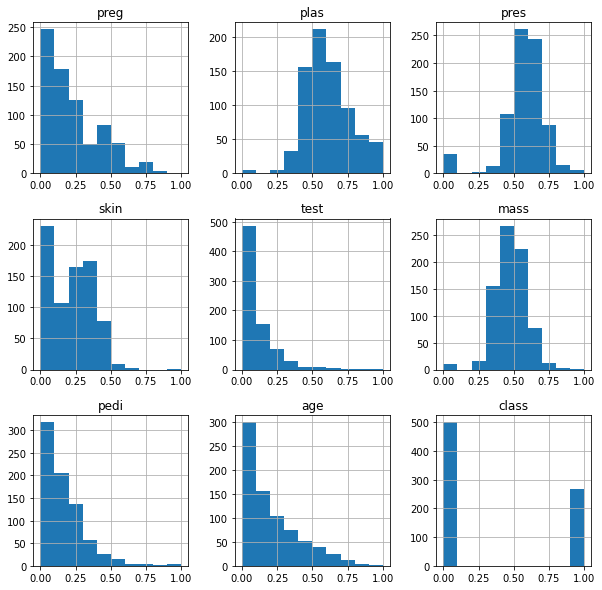

In [40]:
data_scaled.hist(figsize = (10,10))